In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
caminho_arquivo_excel = '/content/drive/MyDrive/ProjetoVeins/ModeloRegressaoLinear/dataset80vh (1).xlsx'
df = pd.read_excel(caminho_arquivo_excel)
print(df.head())

   ID  Posicao  Velocidade
0  16        0           0
1  16       30           1
2  16       31           3
3  16       35           5
4  16       41           6


In [160]:
series_contagem = []

contador_por_id = {}

for indice, linha in df.iterrows():
    id_atual = linha['ID']

    # Se o id atual não existir no dicionário, inicializa o contador para 1
    if id_atual not in contador_por_id:
        contador_por_id[id_atual] = 1
    else:
        # Caso contrário, incrementa o contador
        contador_por_id[id_atual] += 1

    # Adiciona o valor do contador à lista
    series_contagem.append(contador_por_id[id_atual])


df['Tempo'] = series_contagem

print(df)

       ID  Posicao  Velocidade  Tempo
0      16        0           0      1
1      16       30           1      2
2      16       31           3      3
3      16       35           5      4
4      16       41           6      5
...   ...      ...         ...    ...
2976  496      524          19     31
2977  496      543          18     32
2978  496      562          20     33
2979  496      582          20     34
2980  496      603          20     35

[2981 rows x 4 columns]


In [161]:
filtered_df = df[df['ID'] == 16]
print(filtered_df)

    ID  Posicao  Velocidade  Tempo
0   16        0           0      1
1   16       30           1      2
2   16       31           3      3
3   16       35           5      4
4   16       41           6      5
5   16       47           8      6
6   16       56           9      7
7   16       66          11      8
8   16       77          13      9
9   16       91          16     10
10  16      107          18     11
11  16      126          20     12
12  16      146          21     13
13  16      167          22     14
14  16      189          21     15
15  16      210          21     16
16  16      231          21     17
17  16      253          21     18
18  16      275          22     19
19  16      297          21     20
20  16      318          21     21
21  16      340          21     22
22  16      361          21     23
23  16      382          22     24
24  16      404          21     25
25  16      426          22     26
26  16      448          21     27
27  16      470     

In [162]:
# Reorganizando as colunas e removendo a coluna 'ID'
df_reorganized = filtered_df[['Tempo', 'Velocidade', 'Posicao']]

# Mostrando o DataFrame reorganizado
print("\nDataFrame Reorganizado:")
print(df_reorganized)


DataFrame Reorganizado:
    Tempo  Velocidade  Posicao
0       1           0        0
1       2           1       30
2       3           3       31
3       4           5       35
4       5           6       41
5       6           8       47
6       7           9       56
7       8          11       66
8       9          13       77
9      10          16       91
10     11          18      107
11     12          20      126
12     13          21      146
13     14          22      167
14     15          21      189
15     16          21      210
16     17          21      231
17     18          21      253
18     19          22      275
19     20          21      297
20     21          21      318
21     22          21      340
22     23          21      361
23     24          22      382
24     25          21      404
25     26          22      426
26     27          21      448
27     28          22      470
28     29          22      492
29     30          21      514
30     31     

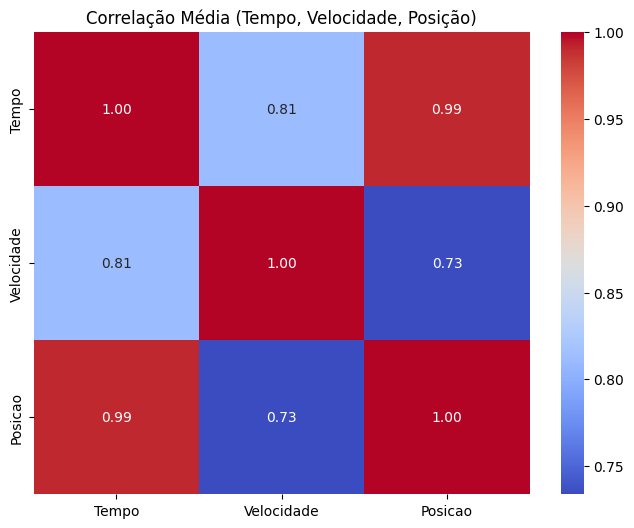

In [163]:
correlation_matrix = df_reorganized[['Tempo', 'Velocidade', 'Posicao']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação Média (Tempo, Velocidade, Posição)')
plt.show()

In [164]:
X = df_reorganized[['Tempo', 'Velocidade']]
y = df_reorganized['Posicao']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [167]:
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [168]:
y_pred = regressor.predict(X_test_scaled)

In [169]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Apresentar as métricas
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 14.94
MSE: 296.09
RMSE: 17.21
R²: 0.99


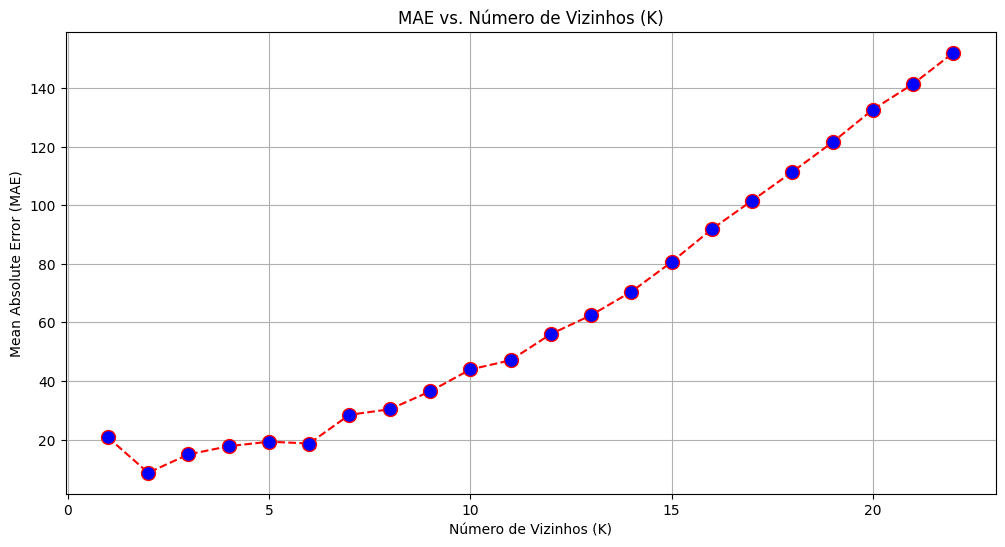

In [170]:
error = []
for i in range(1, len(X_train)):  # Teste de 1 a len(X_train) - 1
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

# Plotando o gráfico de MAE vs. Número de Vizinhos
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(X_train)), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('MAE vs. Número de Vizinhos (K)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(True)
plt.show()

In [171]:
min_mae = min(error)
best_k = np.array(error).argmin() + 1  # +1 porque o índice começa em 0, mas k começa em 1

print(f'Menor MAE encontrado: {min_mae}')
print(f'Melhor valor de k: {best_k}')

Menor MAE encontrado: 8.681818181818182
Melhor valor de k: 2


In [172]:
best_knn_reg = KNeighborsRegressor(n_neighbors=best_k)
best_knn_reg.fit(X_train, y_train)
y_pred_best = best_knn_reg.predict(X_test)

# Avaliando o desempenho do modelo com o melhor k
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
r2_best = best_knn_reg.score(X_test, y_test)

print(f'\nDesempenho do modelo com o melhor k:')
print(f'r2: {r2_best}')
print(f'mae: {mae_best}')
print(f'mse: {mse_best}')
print(f'rmse: {rmse_best}')


Desempenho do modelo com o melhor k:
r2: 0.9940786830258902
mae: 8.681818181818182
mse: 189.02272727272728
rmse: 13.7485536429374


In [173]:
regressor_knn = KNeighborsRegressor(n_neighbors=9)

In [174]:
regressor_knn.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred = regressor_knn.predict(X_test)

# Comparando valores reais e preditos
resultado = pd.DataFrame({'Atual': y_test, 'Predicao': y_pred})
print("\nComparação entre valores reais e preditos:")
print(resultado)


Comparação entre valores reais e preditos:
    Atual    Predicao
15    210  225.222222
19    297  289.111111
27    470  465.222222
26    448  465.222222
8      77   92.666667
24    404  429.111111
21    340  325.222222
12    146  225.222222
32    579  465.222222
9      91  138.000000
0       0   59.888889
